In [ ]:
!pip install matplotlib --quiet
!pip install seaborn --quiet
!pip install wordcloud --quiet

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import datetime
import pandas as pd
import numpy as np

In [264]:
filename = "../raw_data/20220601_larger_data_b_scraped_clean.csv"
data = pd.read_csv(filename).drop(columns = {'Unnamed: 0', 'Content'})#.iloc[0:100]
data['date'] = pd.to_datetime(data['date'])
data.head(4)

,title,cellar,date,dir_code,dir_1,dir_2,dir_3,dir_4,dir_5,dir_6
0,Regulation (EU) 2020/1503 of the European Parl...,5f5898ca-1299-11eb-9a54-01aa75ed71a1,2020-10-20,62020.0,Right of establishment and freedom to provide ...,Sectoral application,Service activities,NaN,NaN,NaN
1,Regulation (EU) 2020/2224 of the European Parl...,0713d9a7-48af-11eb-b59f-01aa75ed71a1,2020-12-28,72030.0,Transport policy,Inland transport,Market operation,NaN,NaN,NaN
2,Commission Implementing Regulation (EU) 2020/1...,a3902456-0d1c-11eb-bc07-01aa75ed71a1,2020-10-13,11604020.0,External relations,Commercial policy,Trade protection,Anti-dumping measures,NaN,NaN
3,Regulation (EU) 2021/691 of the European Parli...,8c5e37a3-ac09-11eb-9767-01aa75ed71a1,2021-05-03,5203020.0,Freedom of movement for workers and social policy,Social policy,Employment and unemployment,Protection of workers,NaN,NaN


**Data exploration**

<AxesSubplot:xlabel='date', ylabel='Count'>

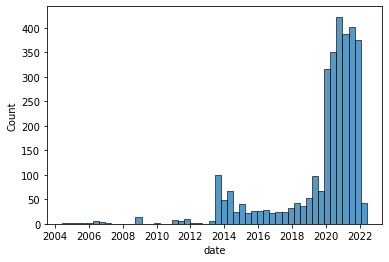

In [265]:
sns.histplot(data['date'], bins = 50)

In [266]:
data['dir_1'].value_counts()

Agriculture                                                   823
Environment, consumers and health protection                  463
Industrial policy and internal market                         355
External relations                                            207
Customs Union and free movement of goods                      185
Right of establishment and freedom to provide services        172
Fisheries                                                     167
Common Foreign and Security Policy                            164
Transport policy                                              152
Area of freedom, security and justice                          59
Economic and monetary policy and free movement of capital      47
General, financial and institutional matters                   42
Energy                                                         31
Taxation                                                       30
Freedom of movement for workers and social policy              29
Science, i

In [267]:
# categories (dir_1) in descending frequencies
dir_1 = data['dir_1'].value_counts().index

In [268]:
# define a time frame
start_date = datetime.datetime.strptime("2020-01-01", '%Y-%m-%d')
end_date = datetime.datetime.strptime("2020-12-31", '%Y-%m-%d')

data_subset = data[np.logical_and(data['date'] >= start_date, data['date'] <= end_date)]
data_subset = data

In [269]:
#create dataframe for the others to append to and rename col to dir name
df = data_subset[data_subset['dir_1'] == dir_1[0]].resample('M', on='date')['title'].count().reset_index().rename(columns={'title':dir_1[0]})

# create dataframe with publications per topic
for i in range(1,len(dir_1)):
    category = dir_1[i]
    temp = data_subset[data_subset['dir_1'] == category].resample('M', on='date')['title'].count().reset_index().rename(columns={'title':category})
    df = df.merge(temp, how='left', on='date').fillna(0)
data_publications = pd.concat([df['date'], df.drop(columns = "date").astype('Int64')], axis=1)

In [270]:
data_publications

,date,Agriculture,"Environment, consumers and health protection",Industrial policy and internal market,External relations,Customs Union and free movement of goods,Right of establishment and freedom to provide services,Fisheries,Common Foreign and Security Policy,Transport policy,...,Economic and monetary policy and free movement of capital,"General, financial and institutional matters",Energy,Taxation,Freedom of movement for workers and social policy,"Science, information, education and culture",Regional policy and coordination of structural instruments,Law relating to undertakings,Competition policy,People's Europe
0,2004-06-30,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2004-07-31,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2004-08-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2004-09-30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2004-10-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208,2021-10-31,13,6,9,7,2,4,6,3,3,...,1,1,0,0,0,0,0,2,0,0
209,2021-11-30,35,18,17,5,4,9,10,8,4,...,0,3,1,1,1,1,0,0,0,0
210,2021-12-31,24,15,7,9,4,6,4,12,4,...,4,1,0,4,0,1,0,0,0,0
211,2022-01-31,9,1,2,0,0,3,6,1,0,...,1,0,0,0,1,0,0,0,0,0


<AxesSubplot:xlabel='date', ylabel='title'>

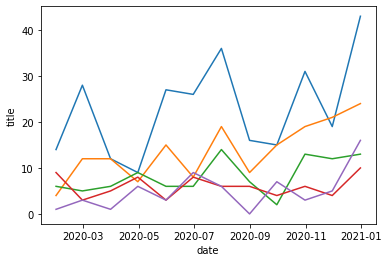

In [42]:
sns.lineplot(data = dir_1_cat0, x = 'date', y = 'title')
sns.lineplot(data = dir_1_cat1, x = 'date', y = 'title')
sns.lineplot(data = dir_1_cat2, x = 'date', y = 'title')
sns.lineplot(data = dir_1_cat3, x = 'date', y = 'title')
sns.lineplot(data = dir_1_cat4, x = 'date', y = 'title')

**Number of publications for selected topics over time**

In [ ]:
data.groupby

In [ ]:
sns.lineplot()

In [141]:
data_subset = data.groupby('dir_1').count()
data_subset

,title,cellar,date,dir_code,dir_2,dir_3,dir_4,dir_5,dir_6
dir_1,,,,,,,,,
Agriculture,823,823,823,823,823,811,0,0,0
"Area of freedom, security and justice",59,59,59,59,59,35,1,0,0
Common Foreign and Security Policy,164,164,164,164,0,0,0,0,0
Competition policy,7,7,7,7,7,1,0,0,0
Customs Union and free movement of goods,185,185,185,185,185,169,107,0,0
Economic and monetary policy and free movement of capital,47,47,47,47,47,34,0,0,0
Energy,31,31,31,31,31,23,0,0,0
"Environment, consumers and health protection",463,463,463,463,463,428,57,0,0
External relations,207,207,207,207,207,199,169,0,0


In [142]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(data['dir_1']))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

TypeError: sequence item 222: expected str instance, float found